# Task 1: Data Preprocessing and Exploratory Data Analysis (EDA)
This notebook covers data extraction, cleaning, EDA, volatility analysis, outlier detection, stationarity tests, and risk metrics for TSLA, BND, and SPY.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

TICKERS = ['TSLA', 'BND', 'SPY']
START_DATE = '2015-07-01'
END_DATE = '2025-07-31'

data = yf.download(TICKERS, start=START_DATE, end=END_DATE, group_by='ticker', auto_adjust=True)
close = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in TICKERS})
close = close.ffill().bfill()
close.head()

[*********************100%***********************]  3 of 3 completed



,TSLA,BND,SPY
Date,,,
2015-07-01,17.943333,60.816708,174.917084
2015-07-02,18.667999,60.967083,174.756958
2015-07-06,18.648001,61.177567,174.259583
2015-07-07,17.858667,61.237728,175.355423
2015-07-08,16.997334,61.410622,172.413452


In [2]:
# Basic statistics and missing values
print('Basic Statistics:')
display(close.describe())
print('Missing values per ticker:')
print(close.isnull().sum())

Basic Statistics:


,TSLA,BND,SPY
count,2535.000000,2535.000000,2535.000000
mean,131.963002,68.469188,334.193732
std,120.914904,4.554601,126.427704
min,9.578000,60.779156,155.869781
25%,18.967667,64.654335,230.083214
50%,94.571335,67.604874,305.264404
75%,236.761665,71.891129,420.350540
max,479.859985,77.318245,637.099976


Missing values per ticker:
TSLA    0
BND     0
SPY     0
dtype: int64


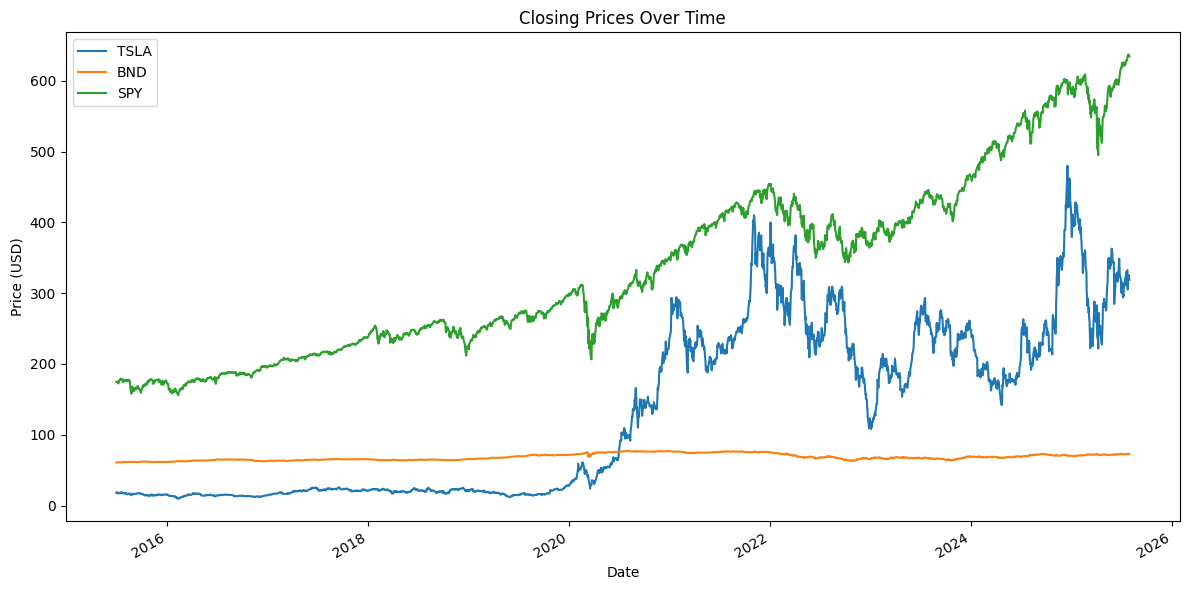

In [3]:
# Plot closing prices
close.plot(figsize=(12,6))
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

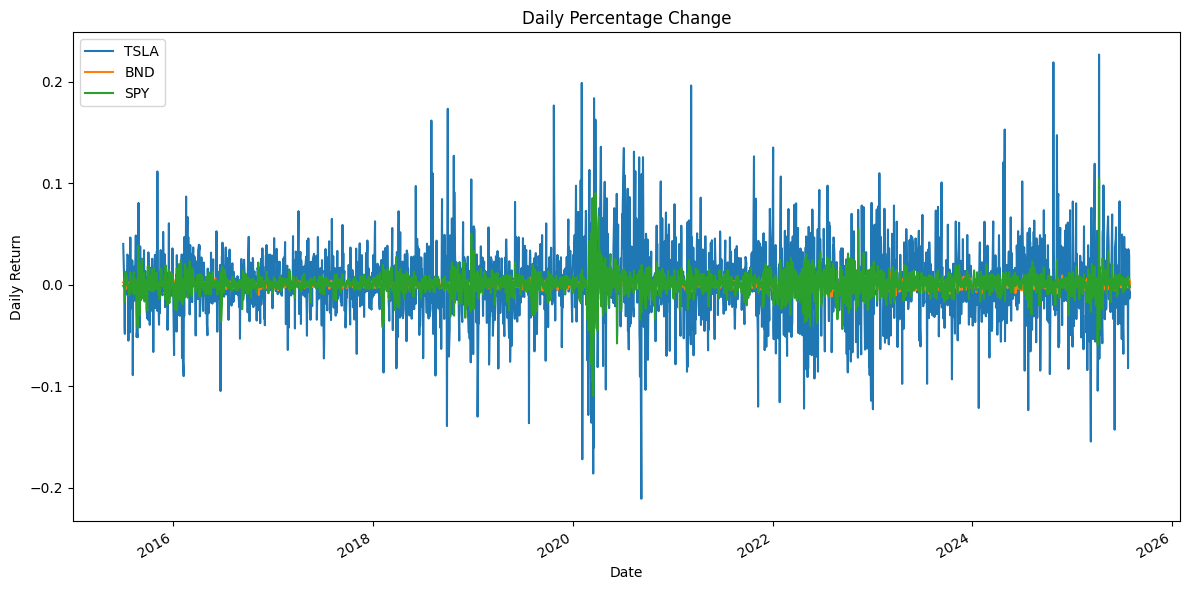

In [4]:
# Daily returns
returns = close.pct_change().dropna()
returns.plot(figsize=(12,6))
plt.title('Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.tight_layout()
plt.show()

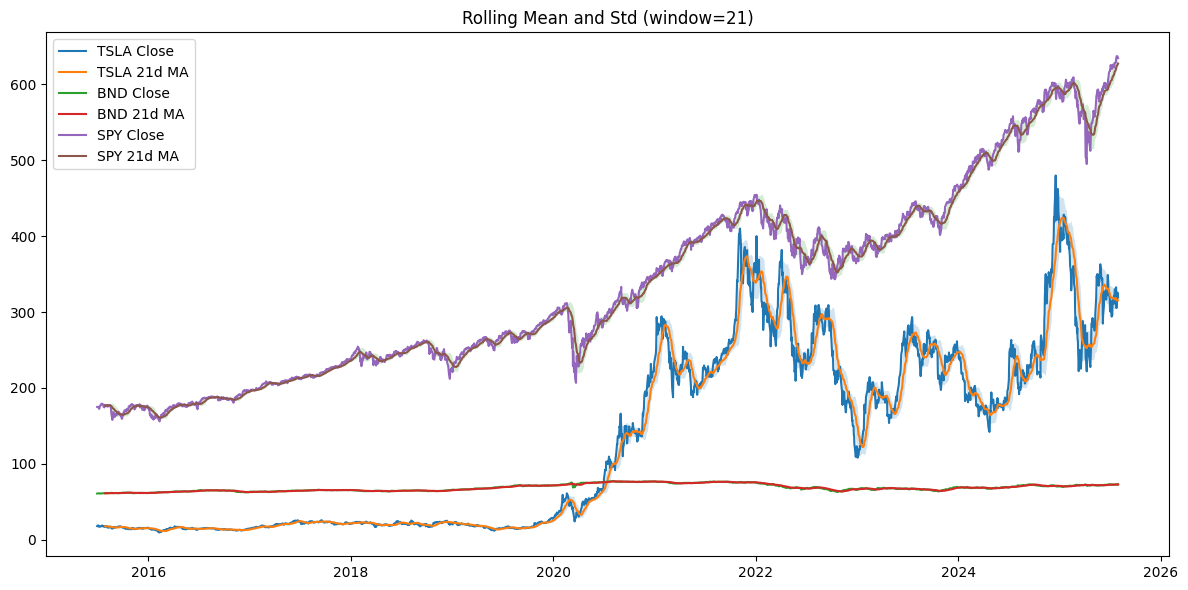

In [5]:
# Rolling mean and std
window = 21
rolling_mean = close.rolling(window).mean()
rolling_std = close.rolling(window).std()
plt.figure(figsize=(12,6))
for ticker in close.columns:
    plt.plot(close[ticker], label=f'{ticker} Close')
    plt.plot(rolling_mean[ticker], label=f'{ticker} {window}d MA')
    plt.fill_between(rolling_std.index, rolling_mean[ticker]-rolling_std[ticker], rolling_mean[ticker]+rolling_std[ticker], alpha=0.2)
plt.title(f'Rolling Mean and Std (window={window})')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
# Outlier detection
z_scores = (returns - returns.mean())/returns.std()
outliers = (np.abs(z_scores) > 3)
print('Outlier days:')
display(returns[outliers.any(axis=1)])

Outlier days:


,TSLA,BND,SPY
Date,,,
2015-08-24,-0.051567,-0.000244,-0.042107
2015-08-26,0.021861,-0.004281,0.038394
2016-06-24,-0.016548,0.005646,-0.035909
2018-02-05,-0.030895,0.004379,-0.041823
2018-02-08,-0.086290,-0.000751,-0.037509
...,...,...,...
2025-04-04,-0.104198,0.000813,-0.058543
2025-04-07,-0.025644,-0.012056,-0.001781
2025-04-09,0.226900,0.002345,0.105019


In [7]:
# Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series.dropna())
    return {'ADF Statistic': result[0], 'p-value': result[1], 'Critical Values': result[4]}
for ticker in close.columns:
    print(f'ADF Test for {ticker} Close:')
    print(adf_test(close[ticker]))
    print(f'ADF Test for {ticker} Returns:')
    print(adf_test(returns[ticker]))

ADF Test for TSLA Close:
{'ADF Statistic': np.float64(-1.418872005396829), 'p-value': np.float64(0.5731959514207214), 'Critical Values': {'1%': np.float64(-3.4329610922579095), '5%': np.float64(-2.8626935681060375), '10%': np.float64(-2.567384088736619)}}
ADF Test for TSLA Returns:
{'ADF Statistic': np.float64(-34.68109047254183), 'p-value': 0.0, 'Critical Values': {'1%': np.float64(-3.4329352851231945), '5%': np.float64(-2.862682171580326), '10%': np.float64(-2.5673780210899224)}}
ADF Test for BND Close:
{'ADF Statistic': np.float64(-1.5362565013996188), 'p-value': np.float64(0.5155056553553874), 'Critical Values': {'1%': np.float64(-3.432946577138947), '5%': np.float64(-2.8626871581881708), '10%': np.float64(-2.5673806760176046)}}
ADF Test for BND Returns:
{'ADF Statistic': np.float64(-9.889792799494531), 'p-value': np.float64(3.583211371024765e-17), 'Critical Values': {'1%': np.float64(-3.4329579682301254), '5%': np.float64(-2.8626921885291017), '10%': np.float64(-2.5673833542324727

In [8]:
# Value at Risk (VaR) and Sharpe Ratio
def value_at_risk(returns, confidence=0.05):
    return returns.quantile(confidence)
def sharpe_ratio(returns, risk_free_rate=0.0):
    return (returns.mean() - risk_free_rate) / returns.std()
for ticker in returns.columns:
    print(f'Value at Risk (5%) for {ticker}: {value_at_risk(returns[ticker])}')
    print(f'Sharpe Ratio for {ticker}: {sharpe_ratio(returns[ticker])}')

Value at Risk (5%) for TSLA: -0.05466309946643584
Sharpe Ratio for TSLA: 0.04903083741009778
Value at Risk (5%) for BND: -0.004899571918164453
Sharpe Ratio for BND: 0.022481389167520027
Value at Risk (5%) for SPY: -0.01719492280384888
Sharpe Ratio for SPY: 0.05002186910768032
